### Decision Tree - Cars-MPG Dataset

In [1]:
import numpy as np   
from sklearn.model_selection import train_test_split

# Import Linear Regression machine learning library
from sklearn.tree import DecisionTreeRegressor

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

In [3]:
cars_df = pd.read_csv('car-mpg.csv')

In [4]:
cars_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [5]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
mpg         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
origin      398 non-null int64
car_type    398 non-null int64
car_name    398 non-null object
dtypes: float64(3), int64(5), object(2)
memory usage: 31.2+ KB


In [41]:
cars_df.isna().sum()

mpg         0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
origin      0
car_type    0
car_name    0
dtype: int64

In [44]:
cars_df.isnull().sum()

mpg         0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
origin      0
car_type    0
car_name    0
dtype: int64

In [113]:
cars_df['hp'][cars_df.applymap(np.isreal).all(1)]

Series([], Name: hp, dtype: float64)

In [12]:
cars_df.shape

(398, 10)

In [20]:
cars_df['hp'].head()

0    130
1    165
2    150
3    150
4    140
Name: hp, dtype: object

In [22]:
temp = pd.DataFrame(cars_df.hp.str.isdigit()) 

In [36]:
cars_df = cars_df.replace('?', np.nan)

In [39]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
mpg         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          392 non-null float64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
origin      398 non-null int64
car_type    398 non-null int64
car_name    398 non-null object
dtypes: float64(4), int64(5), object(1)
memory usage: 31.2+ KB


In [38]:
cars_df['hp'] = cars_df['hp'].astype('float64')

In [46]:
cars_df['hp'].fillna(value = cars_df['hp'].median(),inplace=True)

In [48]:
cars_df['hp'].isna().sum()

0

### Plots

In [49]:
#pair plot analysis to visually check number of likely clusters

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


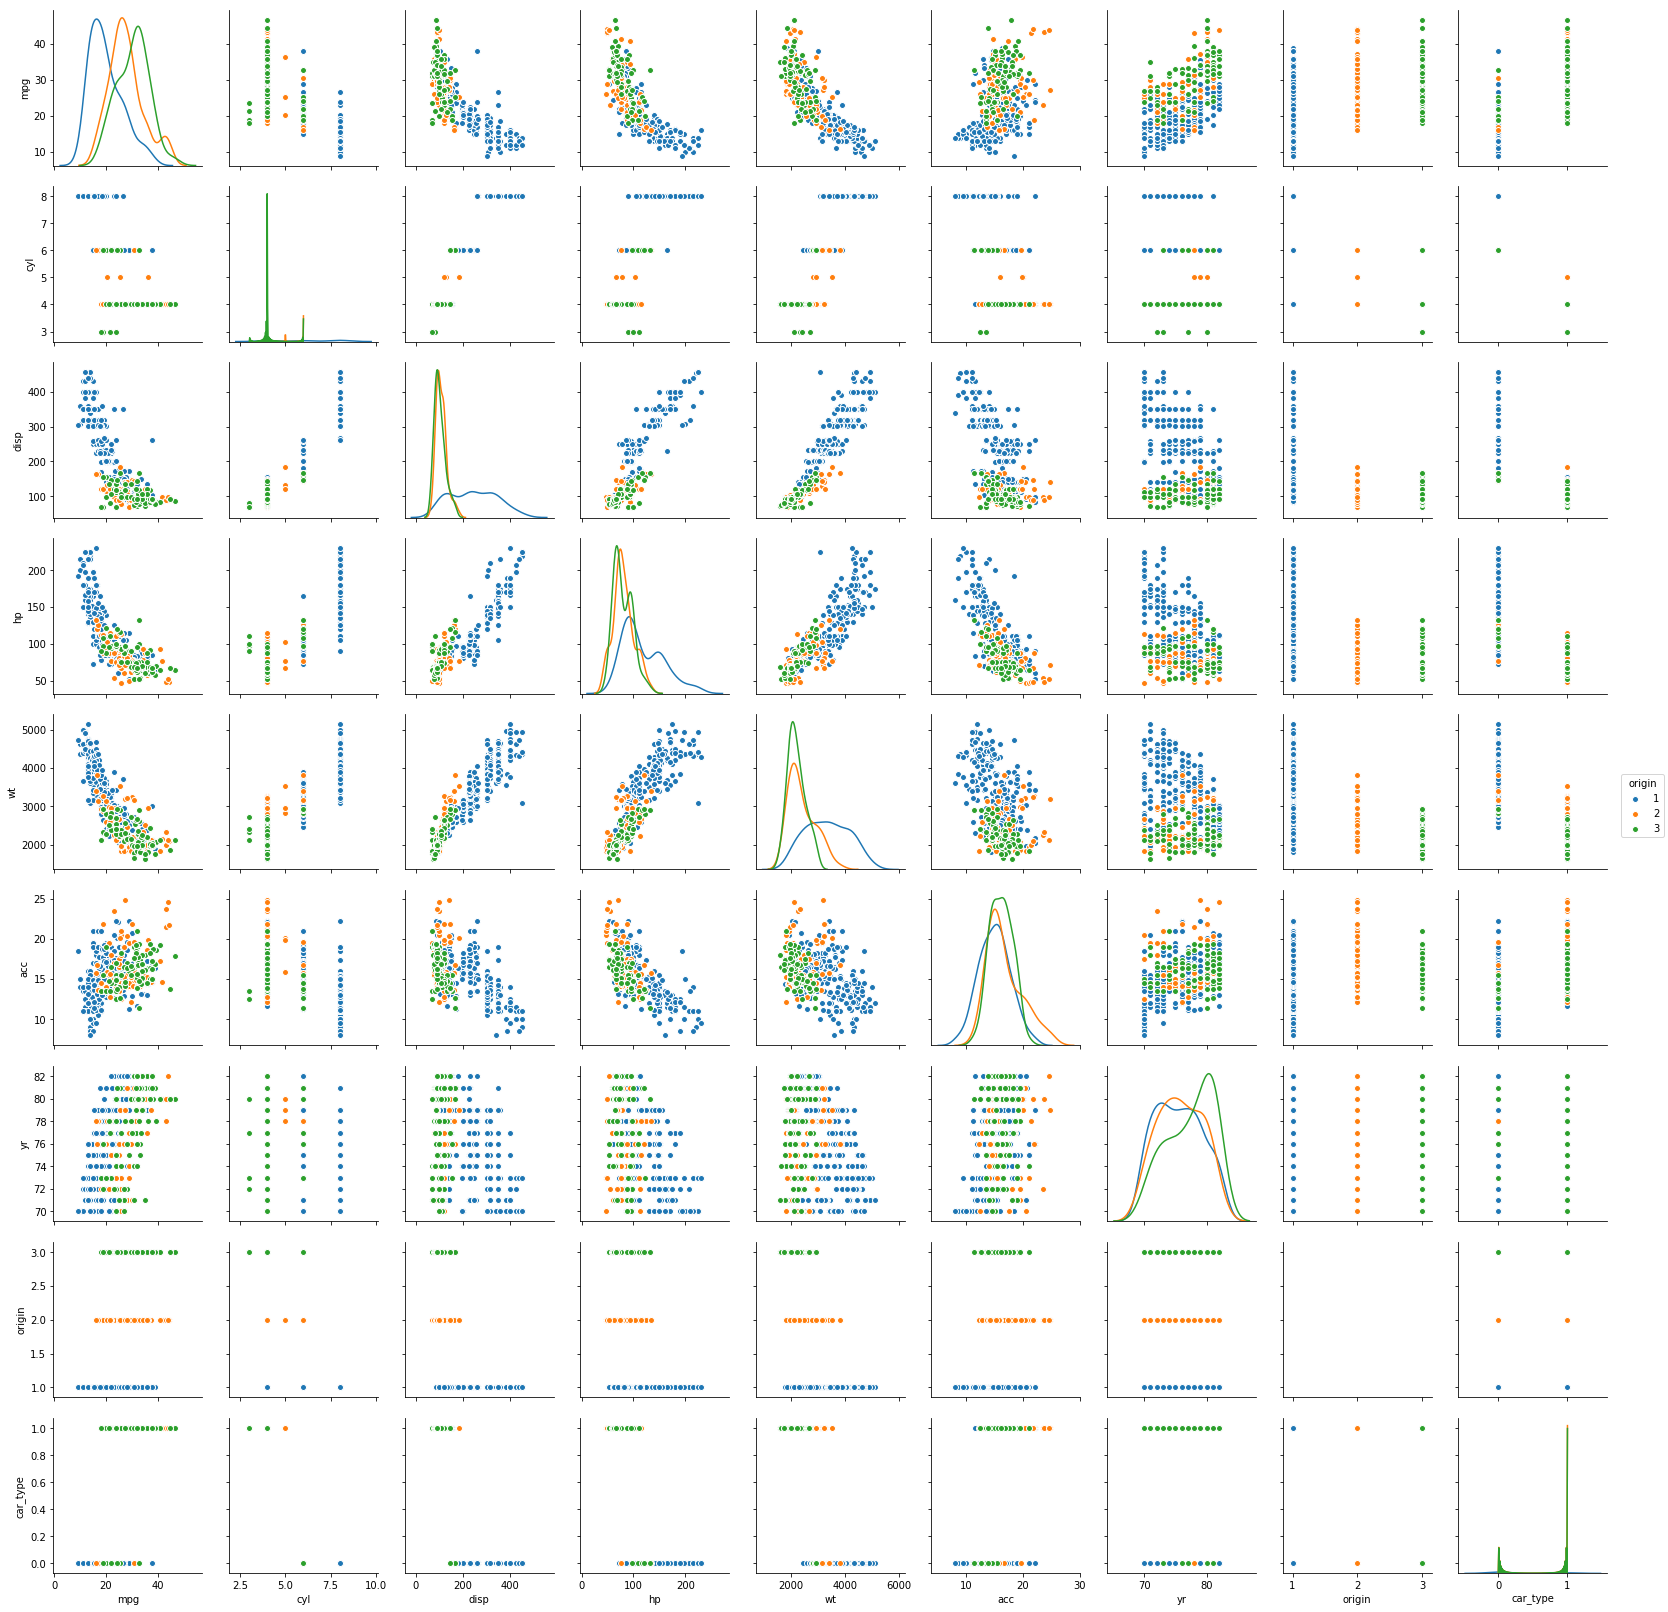

In [51]:
mpg_df_attr = cars_df.iloc[:, 0:9]
sns.pairplot(mpg_df_attr, diag_kind='kde', hue = 'origin')   # to plot density curve instead of histogram

### Split the data

In [63]:
# from sklearn.model_selection import train_test_split
# x = cars_df.loc[:, 'cyl':'origin']
# y = cars_df.iloc[:, 0]
# x.head()

,cyl,disp,hp,wt,acc,yr,origin
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1


In [64]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

### Convert the values to Z-Score

In [65]:
from scipy.stats import zscore

In [68]:
mpg_df_attr = cars_df.loc[:, 'mpg':'origin']
mpg_df_attr_z = mpg_df_attr.apply(zscore)

mpg_df_attr_z.pop('origin')      # Remove "origin" and "yr" columns
mpg_df_attr_z.pop('yr')

array = mpg_df_attr_z.values
X = array[:,1:5] # select all rows and first 4 columns which are the attributes
y = array[:,0]   # select all rows and the 0th column which is the classification "Yes", "No" for diabeties
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


### Decision Tree Regressor

In [69]:
regressor = DecisionTreeRegressor(random_state=0, max_depth=3)

regressor.fit(X_train , y_train)
feature_importances = regressor.feature_importances_


feature_names = mpg_df_attr.columns[1:9]
print(feature_names)

k = 8
top_k_idx = feature_importances.argsort()[-k:][::-1]
print(feature_names[top_k_idx], feature_importances)

Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin'], dtype='object')
Index(['cyl', 'hp', 'wt', 'disp'], dtype='object') [0.74791504 0.01157464 0.19724952 0.04326079]


### Prediction

In [70]:
y_pred = regressor.predict(X_test)

### Plotting the results

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


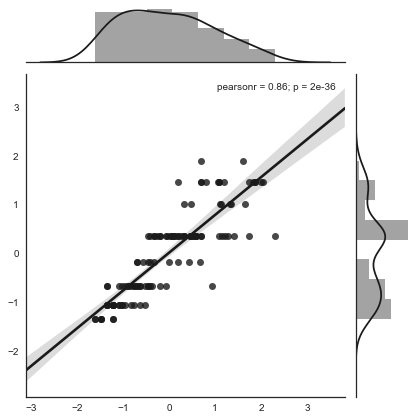

In [72]:
import seaborn as sns
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");

In [73]:
# 1. Drop acc column based on the above visual analysis

mpg_df_attr_z.pop('acc')

array = mpg_df_attr_z.values
X = array[:,1:5] # select all rows and first 7 columns which are the attributes
y = array[:,0]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [74]:
regressor.fit(X_train , y_train)
y_pred = regressor.predict(X_test)

regressor.feature_importances_

array([0.74791504, 0.01157464, 0.19724952, 0.04326079])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


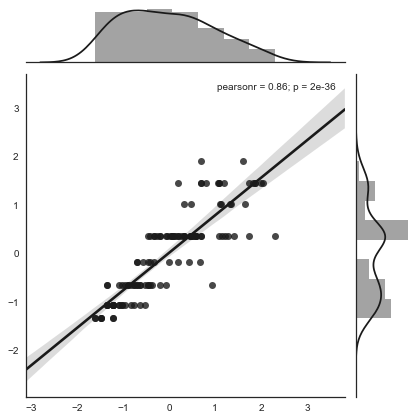

In [75]:
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");

### Random Forest

In [76]:
from sklearn.ensemble import RandomForestRegressor

In [84]:
regressor = RandomForestRegressor(n_estimators=20)

In [85]:
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [86]:
y_pred = regressor.predict(X_test)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


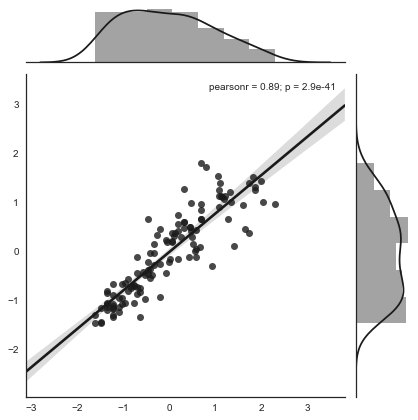

In [87]:
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");

### Boosting technique

In [89]:
from sklearn.ensemble import AdaBoostRegressor

In [97]:
classifier_boost = AdaBoostRegressor(n_estimators=50,random_state=0)

In [98]:
classifier_boost.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=0)

In [99]:
classifier_boost.score(X_test,y_test)

0.7445180140818974

In [100]:
y_pred = classifier_boost.predict(X_test)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


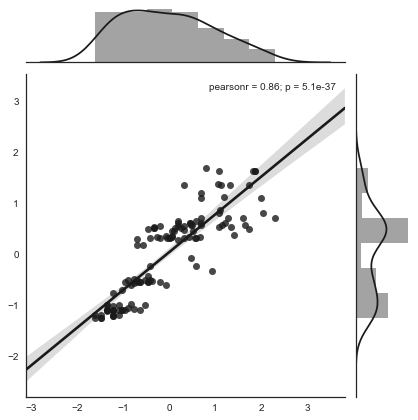

In [101]:
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");

### Ensemble Gradient Boost Algorithm

In [106]:
from sklearn.ensemble import GradientBoostingRegressor

In [109]:
gb_reg = GradientBoostingRegressor(n_estimators=10,random_state=0)

In [110]:
gb_reg.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=10, presort='auto', random_state=0,
             subsample=1.0, verbose=0, warm_start=False)

In [111]:
y_pr = gb_reg.predict(X_test)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


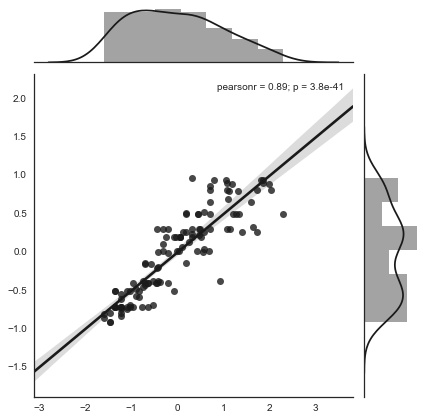

In [112]:
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pr, kind="reg", color="k");